In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/frenchenglish-bilingual-pairs/fra.txt
/kaggle/input/frenchenglish-bilingual-pairs/_about.txt
/kaggle/input/frenchenglish-bilingual-pairs/fra-eng/fra.txt
/kaggle/input/frenchenglish-bilingual-pairs/fra-eng/_about.txt


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [101]:
lines =[]
with open('/kaggle/input/frenchenglish-bilingual-pairs/fra-eng/fra.txt','r') as f:
    lines.extend(f.readline() for i in range(5))

In [102]:
lines

['Go.\tVa !\n',
 'Run!\tCours\u202f!\n',
 'Run!\tCourez\u202f!\n',
 'Wow!\tÇa alors\u202f!\n',
 'Fire!\tAu feu !\n']

In [103]:
df = pd.read_csv('/kaggle/input/frenchenglish-bilingual-pairs/fra-eng/fra.txt', sep = '\t', header = None)

In [104]:
df.head()

,0,1
0,Go.,Va !
1,Run!,Cours !
2,Run!,Courez !
3,Wow!,Ça alors !
4,Fire!,Au feu !


In [105]:
df.tail()

,0,1
145432,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
145433,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
145434,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
145435,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...
145436,It may be impossible to get a completely error...,Il est peut-être impossible d'obtenir un Corpu...


In [106]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
df.columns = ['English','French']

In [107]:
df

,English,French
0,Go.,Va !
1,Run!,Cours !
2,Run!,Courez !
3,Wow!,Ça alors !
4,Fire!,Au feu !
...,...,...
145432,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
145433,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
145434,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
145435,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


basic eda

In [108]:
#How to calculate number of words in a string in DataFrame:
#https://stackoverflow.com/a/37483537/4084039
word_count = df['English'].str.split().apply(len).value_counts()

In [109]:
type(word_count)

pandas.core.series.Series

In [110]:
word_count

5     27739
6     25583
4     22174
7     19499
8     13210
3     12269
9      8080
10     5198
11     3313
2      3248
12     1942
13     1178
14      779
15      441
16      307
17      130
18       85
19       66
20       43
1        39
22       29
21       25
23       15
24        9
25        8
27        8
26        4
30        3
31        3
32        2
34        2
44        1
37        1
43        1
28        1
35        1
47        1
Name: English, dtype: int64

In [111]:
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))

In [112]:
word_dict

{44: 1,
 37: 1,
 43: 1,
 28: 1,
 35: 1,
 47: 1,
 32: 2,
 34: 2,
 30: 3,
 31: 3,
 26: 4,
 25: 8,
 27: 8,
 24: 9,
 23: 15,
 21: 25,
 22: 29,
 1: 39,
 20: 43,
 19: 66,
 18: 85,
 17: 130,
 16: 307,
 15: 441,
 14: 779,
 13: 1178,
 12: 1942,
 2: 3248,
 11: 3313,
 10: 5198,
 9: 8080,
 3: 12269,
 8: 13210,
 7: 19499,
 4: 22174,
 6: 25583,
 5: 27739}

In [113]:
index  = np.arange(len(word_dict))

In [114]:
values1 = word_dict.values()

In [115]:
values1

dict_values([1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 8, 8, 9, 15, 25, 29, 39, 43, 66, 85, 130, 307, 441, 779, 1178, 1942, 3248, 3313, 5198, 8080, 12269, 13210, 19499, 22174, 25583, 27739])

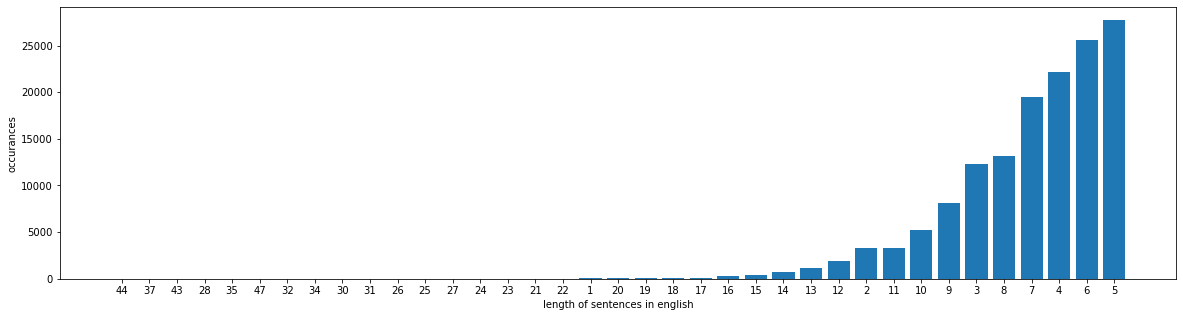

In [116]:
plt.figure(figsize=(20,5))
plt.bar(index,values1)
plt.xlabel('length of sentences in english')
plt.ylabel('occurances')
plt.xticks(index,word_dict.keys())
plt.show()

In [117]:
word_count = df['French'].str.split().apply(len).value_counts()

In [118]:
word_count

6     24538
5     23977
7     20326
4     18382
8     15184
9     10648
3      9662
10     7192
11     4780
12     3048
2      2045
13     1839
14     1271
15      870
16      518
17      338
18      177
1       171
19      154
20      101
21       47
22       46
23       36
24       19
26       13
28       13
27       11
25        8
29        5
31        3
33        3
30        2
32        2
47        2
40        1
49        1
51        1
37        1
35        1
54        1
Name: French, dtype: int64

In [119]:
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))

In [120]:
word_dict

{40: 1,
 49: 1,
 51: 1,
 37: 1,
 35: 1,
 54: 1,
 30: 2,
 32: 2,
 47: 2,
 31: 3,
 33: 3,
 29: 5,
 25: 8,
 27: 11,
 26: 13,
 28: 13,
 24: 19,
 23: 36,
 22: 46,
 21: 47,
 20: 101,
 19: 154,
 1: 171,
 18: 177,
 17: 338,
 16: 518,
 15: 870,
 14: 1271,
 13: 1839,
 2: 2045,
 12: 3048,
 11: 4780,
 10: 7192,
 3: 9662,
 9: 10648,
 8: 15184,
 4: 18382,
 7: 20326,
 5: 23977,
 6: 24538}

In [121]:
index  = np.arange(len(word_dict))
values2 = word_dict.values()

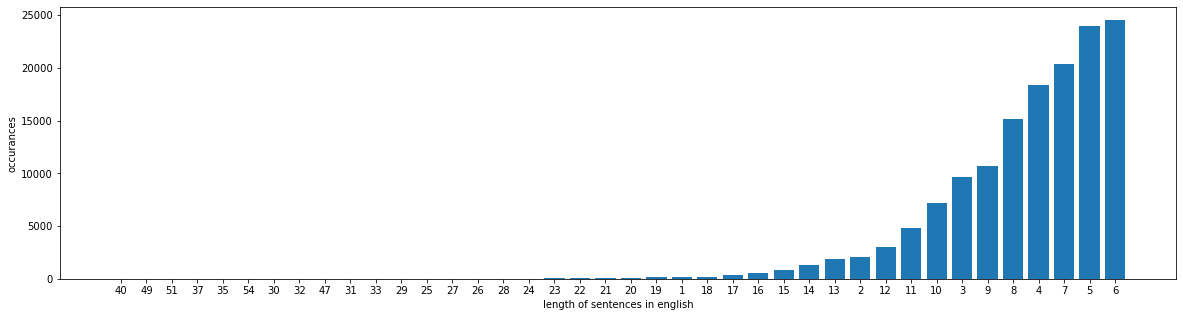

In [122]:
plt.figure(figsize=(20,5))
plt.bar(index,values2)
plt.xlabel('length of sentences in english')
plt.ylabel('occurances')
plt.xticks(index,word_dict.keys())
plt.show()

In [123]:
len(word_dict)

40

In [124]:
word_count = df['French'].str.split().apply(len)

In [125]:
word_count

0          2
1          2
2          2
3          3
4          3
          ..
145432    33
145433    47
145434    49
145435    54
145436    51
Name: French, Length: 145437, dtype: int64

In [126]:
french_lenght_of_sentences = word_count.values

In [127]:
word_count = df['English'].str.split().apply(len)

In [128]:
english_lenght_of_sentences = word_count.values

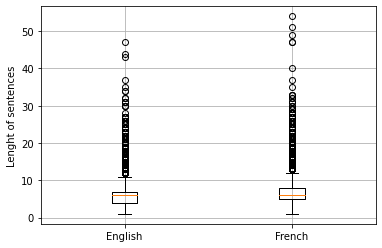

In [129]:
plt.boxplot([english_lenght_of_sentences,french_lenght_of_sentences])
plt.xticks([1,2],['English','French'])
plt.ylabel('Lenght of sentences')
plt.grid()
plt.show()

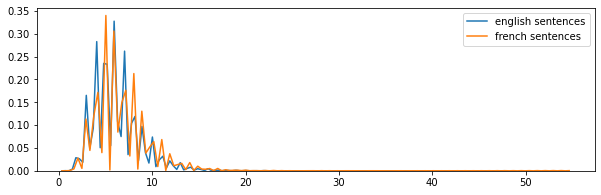

In [130]:
plt.figure(figsize=(10,3))
sns.kdeplot(english_lenght_of_sentences,label="english sentences")
sns.kdeplot(french_lenght_of_sentences,label="french sentences")
plt.legend()
plt.show()

In [132]:
import numpy as np
import tensorflow as tf
import keras
import tqdm as tqdm
from tensorflow.keras.layers import Dense,concatenate,Activation,Dropout,Input,LSTM,Embedding,Flatten,Conv1D,BatchNormalization
from tensorflow.keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [134]:
batch_size = 64  # Batch size for training.
epochs = 20  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 15437  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = '/kaggle/input/frenchenglish-bilingual-pairs/fra-eng/fra.txt'

In [135]:
# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()

In [136]:
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')

In [137]:
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

In [138]:
target_characters

{'\t',
 '\n',
 ' ',
 '!',
 '"',
 '$',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\xa0',
 '«',
 '»',
 'À',
 'Ç',
 'É',
 'Ê',
 'Ô',
 'à',
 'â',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'î',
 'ï',
 'ô',
 'ù',
 'û',
 'œ',
 '\u2009',
 '‘',
 '’',
 '\u202f'}

In [139]:
input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [140]:
print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

Number of samples: 15437
Number of unique input tokens: 74
Number of unique output tokens: 101
Max sequence length for inputs: 18
Max sequence length for outputs: 59


In [141]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

In [142]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [143]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    decoder_target_data[i, t:, target_token_index[' ']] = 1.

In [144]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [145]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [146]:
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [147]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, 74)]   0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None, 101)]  0                                            
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 256), (None, 338944      input_5[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, None, 256),  366592      input_6[0][0]                    
                                                                 lstm_3[0][1]               

In [148]:
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/20
193/193 [==============================] - 49s 254ms/step - loss: 1.1450 - accuracy: 0.7184 - val_loss: 1.0461 - val_accuracy: 0.7204
Epoch 2/20
193/193 [==============================] - 53s 272ms/step - loss: 0.7718 - accuracy: 0.7827 - val_loss: 0.8148 - val_accuracy: 0.7675
Epoch 3/20
193/193 [==============================] - 48s 251ms/step - loss: 0.6409 - accuracy: 0.8117 - val_loss: 0.7251 - val_accuracy: 0.7850
Epoch 4/20
193/193 [==============================] - 49s 254ms/step - loss: 0.5746 - accuracy: 0.8302 - val_loss: 0.6637 - val_accuracy: 0.8051
Epoch 5/20
193/193 [==============================] - 59s 307ms/step - loss: 0.5264 - accuracy: 0.8443 - val_loss: 0.6215 - val_accuracy: 0.8184
Epoch 6/20
193/193 [==============================] - 48s 250ms/step - loss: 0.4952 - accuracy: 0.8529 - val_loss: 0.5956 - val_accuracy: 0.8224
Epoch 7/20
193/193 [==============================] - 48s 247ms/step - loss: 0.4659 - accuracy: 0.8604 - val_loss: 0.5642 - val_ac

In [149]:
# Save model
model.save('s2s.h5')

In [150]:
from keras.models import load_model

model = load_model("s2s.h5")

In [151]:

# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

In [152]:
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)


In [153]:
# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())


In [154]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [155]:
from nltk.translate.bleu_score import sentence_bleu
for seq_index in range(10,12):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)
    
    score = sentence_bleu(input_texts[seq_index], target_texts[seq_index])
    print('from original sentence',score)
    
    score = sentence_bleu(input_texts[seq_index], decoded_sentence)
    print('from converted sentence',score)

-
Input sentence: Wait!
Decoded sentence: Attendez !

from original sentence 0.6529942057256104
from converted sentence 0.6529942057256104


/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


-
Input sentence: Wait!
Decoded sentence: Attendez !

from original sentence 0.6389431042462724
from converted sentence 0.6529942057256104


In [156]:
df[10:12]

,English,French
10,Wait!,Attends !
11,Wait!,Attendez !


# now instead of using characters we will be using word embeddings

In [10]:
df  = df[0:12000]

In [11]:
df.shape

(12000, 2)

In [12]:
df['Decoder'] = df['French'] + ' \n'

In [13]:
df['French']  = '\t ' + df['French']  + ' \n'

In [14]:
df[0:10]

,English,French,Decoder
0,Go.,\t Va ! \n,Va ! \n
1,Run!,\t Cours ! \n,Cours ! \n
2,Run!,\t Courez ! \n,Courez ! \n
3,Wow!,\t Ça alors ! \n,Ça alors ! \n
4,Fire!,\t Au feu ! \n,Au feu ! \n
5,Help!,\t À l'aide ! \n,À l'aide ! \n
6,Jump.,\t Saute. \n,Saute. \n
7,Stop!,\t Ça suffit ! \n,Ça suffit ! \n
8,Stop!,\t Stop ! \n,Stop ! \n
9,Stop!,\t Arrête-toi ! \n,Arrête-toi ! \n


In [15]:
df=  df.applymap(str.lower)

In [16]:
df[0:10]

,English,French,Decoder
0,go.,\t va ! \n,va ! \n
1,run!,\t cours ! \n,cours ! \n
2,run!,\t courez ! \n,courez ! \n
3,wow!,\t ça alors ! \n,ça alors ! \n
4,fire!,\t au feu ! \n,au feu ! \n
5,help!,\t à l'aide ! \n,à l'aide ! \n
6,jump.,\t saute. \n,saute. \n
7,stop!,\t ça suffit ! \n,ça suffit ! \n
8,stop!,\t stop ! \n,stop ! \n
9,stop!,\t arrête-toi ! \n,arrête-toi ! \n


In [ ]:
#y = df['Decoder']
#X = df.drop(['Decoder'],axis =1)

In [ ]:
#print(y.shape)
#print(X.shape)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [18]:
max_english_sentence_lenght = 0
for i in range(df['English'].shape[0]):
    a = len(df['English'].iloc[i].split())
    if a > max_english_sentence_lenght:
        max_english_sentence_lenght =a


In [19]:
max_english_sentence_lenght

5

In [20]:
tokenizer = Tokenizer( filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(df['English'])

In [21]:
sequence_train = tokenizer.texts_to_sequences(df['English'])
#sequence_test = tokenizer.texts_to_sequences(X_test['English'])

In [22]:
english_dic = tokenizer.word_index

In [23]:
english_vocab = len(tokenizer.word_index) + 1

In [24]:
english_vocab

2503

In [25]:
sequence_train[0:10]

[[16], [128], [128], [1737], [631], [62], [825], [56], [56], [56]]

In [26]:
#need to cover the case if state that is present in test data may not be present in train data by padding although X_train 
# consists all the state
#english_test_text = pad_sequences(sequence_test, max_english_sentence_lenght,padding ='post')
english_train_text = pad_sequences(sequence_train, max_english_sentence_lenght,padding = 'post')


In [27]:
english_train_text[0:10]

array([[  16,    0,    0,    0,    0],
       [ 128,    0,    0,    0,    0],
       [ 128,    0,    0,    0,    0],
       [1737,    0,    0,    0,    0],
       [ 631,    0,    0,    0,    0],
       [  62,    0,    0,    0,    0],
       [ 825,    0,    0,    0,    0],
       [  56,    0,    0,    0,    0],
       [  56,    0,    0,    0,    0],
       [  56,    0,    0,    0,    0]], dtype=int32)

In [28]:
max_french_sentence_lenght = 0
for i in range(df['French'].shape[0]):
    a = len(df['French'].iloc[i].split())
    if a > max_french_sentence_lenght:
        max_french_sentence_lenght =a


In [29]:
max_french_sentence_lenght

11

In [30]:
tokenizer = Tokenizer( filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~')
tokenizer.fit_on_texts(df['French'])

In [31]:
sequence_train = tokenizer.texts_to_sequences(df['French'])
#sequence_test = tokenizer.texts_to_sequences(X_test['French'])

In [32]:
decoder_train = tokenizer.texts_to_sequences(df['Decoder'])
#decoder_test = tokenizer.texts_to_sequences(y_test)

In [33]:
french_dic = tokenizer.word_index

In [34]:
french_dic

{'\t': 1,
 '\n': 2,
 'je': 3,
 'vous': 4,
 'nous': 5,
 'suis': 6,
 'il': 7,
 'pas': 8,
 'est': 9,
 'le': 10,
 'ne': 11,
 'tu': 12,
 "c'est": 13,
 'de': 14,
 "j'ai": 15,
 'me': 16,
 'tom': 17,
 'la': 18,
 'un': 19,
 'êtes': 20,
 'ce': 21,
 'en': 22,
 'à': 23,
 'sommes': 24,
 'a': 25,
 'les': 26,
 'ça': 27,
 'moi': 28,
 'es': 29,
 'elle': 30,
 'une': 31,
 'que': 32,
 'sont': 33,
 'ils': 34,
 'qui': 35,
 'elles': 36,
 'fait': 37,
 'y': 38,
 'ai': 39,
 'des': 40,
 'toi': 41,
 "n'est": 42,
 'bien': 43,
 'tout': 44,
 'ici': 45,
 'mon': 46,
 'faut': 47,
 'te': 48,
 'soyez': 49,
 "l'ai": 50,
 'du': 51,
 'peux': 52,
 'besoin': 53,
 'veux': 54,
 'été': 55,
 'aller': 56,
 'fais': 57,
 'train': 58,
 "l'air": 59,
 'va': 60,
 'avons': 61,
 'sois': 62,
 "j'aime": 63,
 'ont': 64,
 'tous': 65,
 'là': 66,
 'se': 67,
 'faire': 68,
 'trop': 69,
 "j'étais": 70,
 'personne': 71,
 'au': 72,
 'sens': 73,
 'puis': 74,
 'as': 75,
 'cela': 76,
 'partir': 77,
 "l'a": 78,
 'on': 79,
 't': 80,
 "j'adore": 81,
 'fai

In [35]:
french_vocab = len(tokenizer.word_index) +1

In [36]:
french_vocab

5202

In [37]:
sequence_train[0:10]

[[1, 60, 2],
 [1, 2603, 2],
 [1, 2604, 2],
 [1, 27, 2605, 2],
 [1, 72, 574, 2],
 [1, 23, 2606, 2],
 [1, 2607, 2],
 [1, 27, 1639, 2],
 [1, 2608, 2],
 [1, 111, 41, 2]]

In [38]:
decoder_train[0:10]

[[60, 2],
 [2603, 2],
 [2604, 2],
 [27, 2605, 2],
 [72, 574, 2],
 [23, 2606, 2],
 [2607, 2],
 [27, 1639, 2],
 [2608, 2],
 [111, 41, 2]]

In [39]:
#need to cover the case if state that is present in test data may not be present in train data by padding although X_train 
# consists all the state
#french_test_text = pad_sequences(sequence_test, max_french_sentence_lenght,padding = 'post')
french_train_text = pad_sequences(sequence_train, max_french_sentence_lenght,padding = 'post')

In [40]:
#need to cover the case if state that is present in test data may not be present in train data by padding although X_train 
# consists all the state
#decoder_test_text = pad_sequences(decoder_test, max_french_sentence_lenght,padding = 'post')
decoder_train_text = pad_sequences(decoder_train, max_french_sentence_lenght,padding = 'post')

In [41]:
french_train_text[0:10]

array([[   1,   60,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1, 2603,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1, 2604,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   27, 2605,    2,    0,    0,    0,    0,    0,    0,    0],
       [   1,   72,  574,    2,    0,    0,    0,    0,    0,    0,    0],
       [   1,   23, 2606,    2,    0,    0,    0,    0,    0,    0,    0],
       [   1, 2607,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   27, 1639,    2,    0,    0,    0,    0,    0,    0,    0],
       [   1, 2608,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,  111,   41,    2,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [42]:
decoder_train_text[0:10]

array([[  60,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2603,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2604,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  27, 2605,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [  72,  574,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [  23, 2606,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [2607,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  27, 1639,    2,    0,    0,    0,    0,    0,    0,    0,    0],
       [2608,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 111,   41,    2,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [43]:
shape_of_decoder = decoder_train_text.shape

In [44]:
np.amax(decoder_train_text)

5201

In [45]:
shape_of_decoder[0]

12000

In [46]:
decoder_encoded_array = np.zeros((12000,11,5202))

In [47]:
for i in range(12000):
    for j in range(11):
        decoder_encoded_array[i,j,decoder_train_text[i,j]] =1 

In [48]:
#decoder_input_array = np.zeros((8000,10,4063))

In [49]:
#for i in range(8000):
 #   for j in range(10):
  #      decoder_input_array[i,j,french_train_text[i,j]] =1

In [50]:
#encoder_input_array = np.zeros((8000,5,2056))

In [51]:
#for i in range(8000):
 #   for j in range(5):
  #      encoder_input_array[i,j,english_train_text[i,j]] =1

In [52]:
#decoder_encoded_array

In [53]:
from tensorflow.keras.layers import Dense,concatenate,Activation,Dropout,Input,LSTM,Embedding,Flatten,Conv1D,BatchNormalization
from keras.models import Model

In [54]:
encoder_input = Input(shape =(5,))#adding voc

In [55]:
#encoder_embedding = Embedding(english_vocab,256)(encoder_input)
#encoder_lstm,state_h,state_c = LSTM(256,return_state = True)(encoder_embedding)

In [56]:
encoder_embedding = Embedding(english_vocab,256)(encoder_input)
encoder = LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embedding)

In [57]:
encoder_states = [state_h,state_c]

In [58]:
state_h.shape

TensorShape([None, 256])

In [59]:
decoder_input =Input(shape=(11,))

In [60]:
#decoder_embedding = Embedding(french_vocab,256)(decoder_input)
#decoder_lstm = LSTM(256,return_sequences = True)(decoder_embedding , initial_state =encoder_states)
#decoder_dense_output = Dense(french_vocab,activation ='softmax')(decoder_lstm)

In [74]:
decoder_embedding = Embedding(french_vocab,256)(decoder_input)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding,initial_state=encoder_states)
decoder_dense = Dense(french_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [63]:
model = Model([encoder_input,decoder_input],decoder_outputs)

In [64]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 11)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 5, 256)       640768      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 11, 256)      1331712     input_2[0][0]                    
______________________________________________________________________________________________

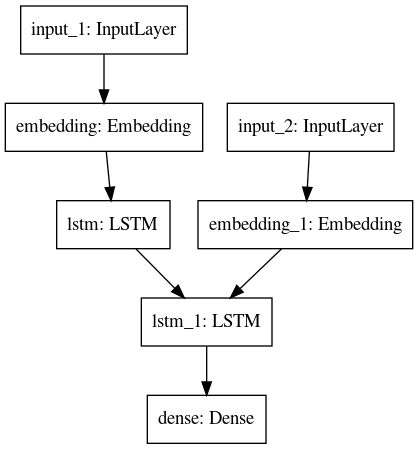

In [65]:
import tensorflow as tf
tf.keras.utils.plot_model(
model,
to_file="model1.png",
show_shapes=False,
show_layer_names=True,
rankdir="TB",
expand_nested=False,
dpi=96,
)


In [66]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ['accuracy'])

In [67]:
batch_size =100
epochs = 10

In [68]:
model.fit([english_train_text, french_train_text], decoder_encoded_array,
          batch_size=batch_size,
          epochs=epochs,
          validation_split = 0.2)

Epoch 1/10
96/96 [==============================] - 32s 335ms/step - loss: 2.5418 - accuracy: 0.6482 - val_loss: 2.3299 - val_accuracy: 0.6666
Epoch 2/10
96/96 [==============================] - 30s 312ms/step - loss: 1.8582 - accuracy: 0.7171 - val_loss: 2.1693 - val_accuracy: 0.6818
Epoch 3/10
96/96 [==============================] - 30s 312ms/step - loss: 1.6781 - accuracy: 0.7371 - val_loss: 2.0680 - val_accuracy: 0.7034
Epoch 4/10
96/96 [==============================] - 30s 311ms/step - loss: 1.5354 - accuracy: 0.7525 - val_loss: 1.9493 - val_accuracy: 0.7173
Epoch 5/10
96/96 [==============================] - 33s 348ms/step - loss: 1.4157 - accuracy: 0.7677 - val_loss: 1.8880 - val_accuracy: 0.7319
Epoch 6/10
96/96 [==============================] - 30s 316ms/step - loss: 1.3179 - accuracy: 0.7822 - val_loss: 1.8269 - val_accuracy: 0.7423
Epoch 7/10
96/96 [==============================] - 29s 302ms/step - loss: 1.2374 - accuracy: 0.7913 - val_loss: 1.7882 - val_accuracy: 0.7478

similarly we can get the sentence in french from english as we have done using decode_sequence fuction in characters representation

source : https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html